In [31]:
import torch
import torchvision
from torch.optim import Adam
from PIL import Image
from torchvision import transforms
from data_utils.pre_process import load_images_from_folder, load_images_and_labels, load_datasets
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt

In [44]:
input_folder_path = "oxford-iiit-pet/images"
label_folder_path = "oxford-iiit-pet/annotations/trimaps"

input_images, label_images = load_images_and_labels(input_folder_path=input_folder_path,
                                                    label_folder_path=label_folder_path)

train_transforms = A.Compose([
    A.Resize(300, 300),
    A.HorizontalFlip(p=0.5),                  
    A.RandomCrop(height=256, width=256), 
    A.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225],
                        max_pixel_value=255.0,
                        normalization="standard", # Default
                        p=1.0),
    A.ToTensorV2()                            
])

val_test_transforms = A.Compose([
    A.Resize(300, 300),
    A.HorizontalFlip(p=0.5),                  
    A.RandomCrop(height=256,width=256),
    A.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225],
                max_pixel_value=255.0,
                normalization="standard", # Default
                p=1.0),
    A.ToTensorV2()                          
])

train_dataset, val_dataset, test_dataset = load_datasets(input_images, 
                                                            label_images, 
                                                            train_transforms,
                                                            val_test_transforms,
                                                            shuffle=False)

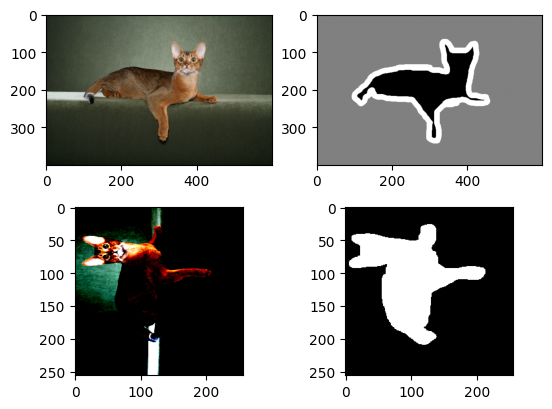

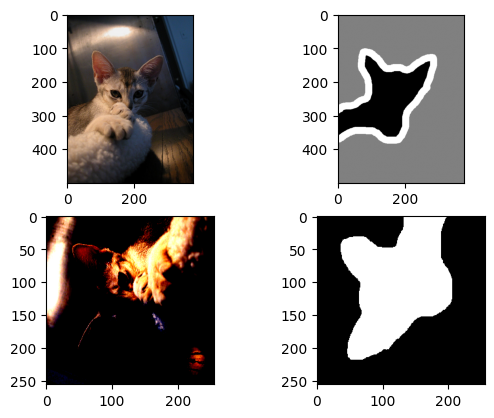

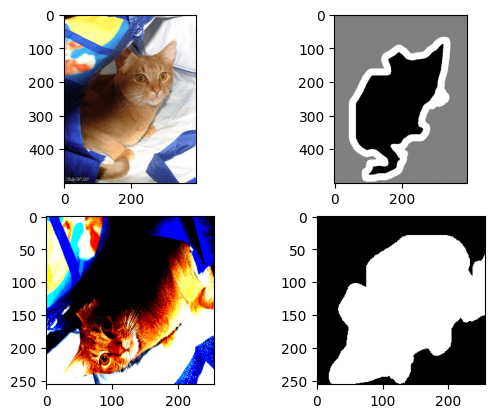

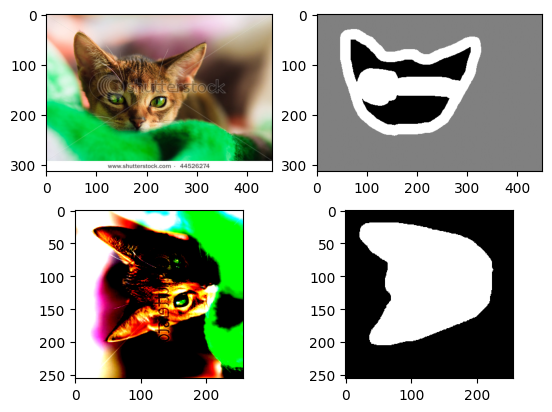

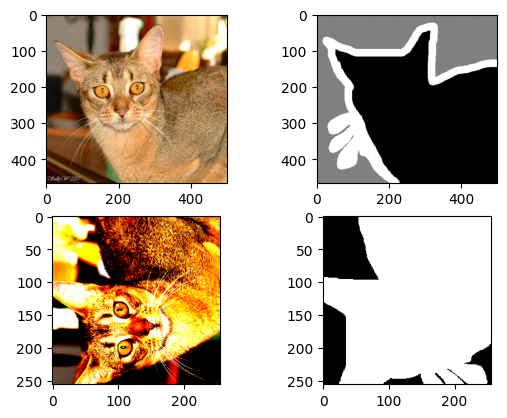

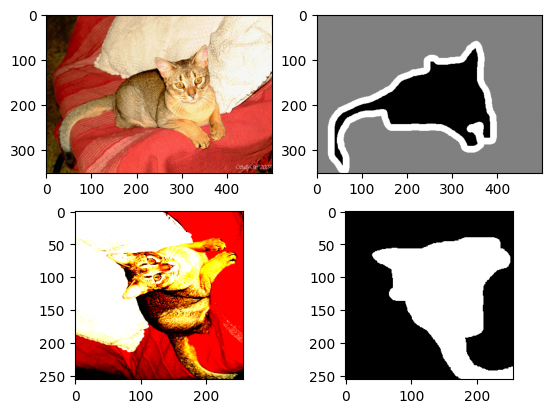

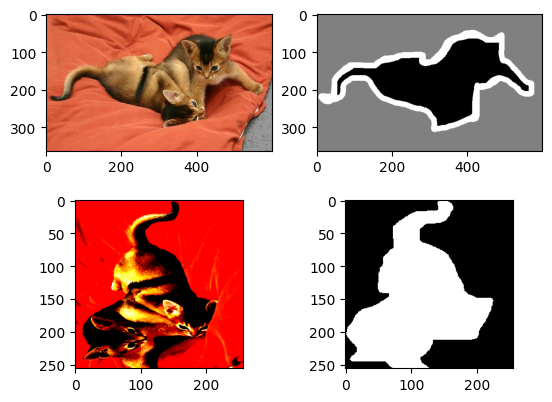

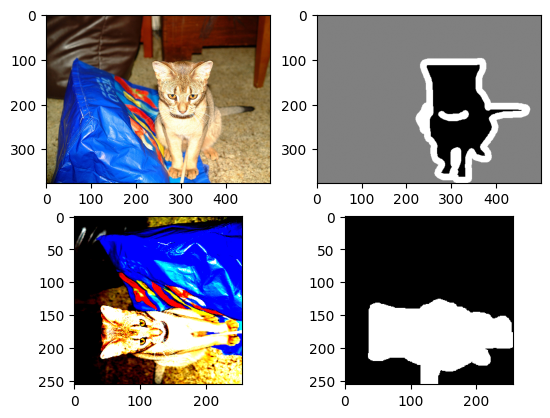

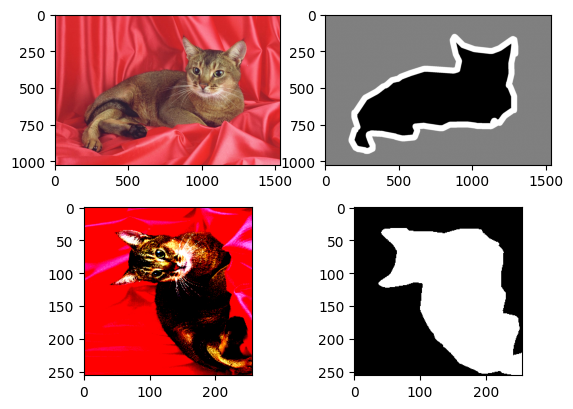

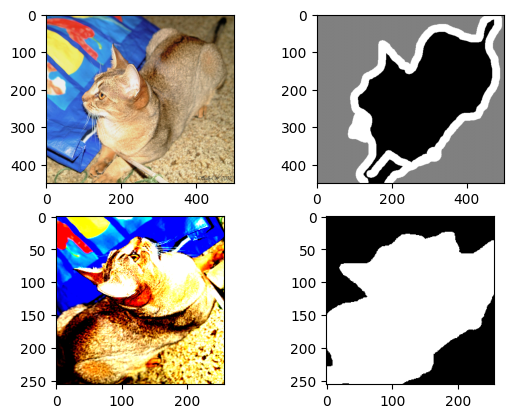

In [46]:
for i in range(10):
    fig, axes = plt.subplots(2,2)
    original_img, original_segment = input_images[i], label_images[i]
    trans_img, trans_segment = train_dataset.__getitem__(i)

    axes[0,0].imshow(original_img)
    axes[0,1].imshow(original_segment, cmap='gray')

    axes[1,0].imshow(np.clip(trans_img.T, 0, 1))
    axes[1,1].imshow(trans_segment.T, cmap='grey')

    plt.show()
    